## CRISP-DM Phase 3. Data Preparation

In [1]:
import sys
import sklearn.neighbors._base
sys.path.append('../src')
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
sys.modules['sklearn.neighbors.base']._check_weights = lambda x: None
import utils
import data_processor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from missingpy import MissForest
from sklearn.model_selection import train_test_split
import keras
import warnings 
warnings.filterwarnings('ignore')

# Load data
df_energy: pd.DataFrame = utils.load_energy_data()
df_weather: pd.DataFrame = utils.load_weather_data()

# Processor objects 
energy_processor = data_processor.DataProcessor(df_energy)
weather_processor = data_processor.DataProcessor(df_weather)

In [2]:
# Addressing time data
energy_processor.set_index_datetime("time")
weather_processor.set_index_datetime("dt_iso")
# rename weather data index to time
weather_processor.data.index.rename("time", inplace=True)

# check if Time is monotonic and increasing
print("Time monotonic and increasing in energy data: {}".format(energy_processor.check_time_monotonicity()))
print("Time monotonic and increasing in weather data: {}".format(weather_processor.check_time_monotonicity()))

Time monotonic and increasing in energy data: True
Time monotonic and increasing in weather data: False


### Label Encoding

In [3]:
energy_processor.label_encoding()
weather_processor.label_encoding()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
time,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,4,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,0,33,2
2015-01-01 00:00:00+00:00,4,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,0,33,2
2015-01-01 01:00:00+00:00,4,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,0,33,2
2015-01-01 02:00:00+00:00,4,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,0,33,2
2015-01-01 03:00:00+00:00,4,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,0,33,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,3,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,0,33,2
2018-12-31 19:00:00+00:00,3,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,0,33,2
2018-12-31 20:00:00+00:00,3,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,0,33,2


### Cleaning Data

In [4]:
energy_processor.remove_zero_variance()
energy_processor.clean_severe_missing()
energy_processor.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil gas                        35046 non-null  float64
 3   generation fossil hard coal                  35046 non-null  float64
 4   generation fossil oil                        35045 non-null  float64
 5   generation hydro pumped storage consumption  35045 non-null  float64
 6   generation hydro run-of-river and poundage   35045 non-null  float64
 7   generation hydro water reservoir             35046 non-null  float64
 8   generation nuclear                           35047 non-null  float64
 9   generation other         

In [5]:
weather_processor.remove_zero_variance()
weather_processor.clean_severe_missing()
weather_processor.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178396 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   city_name            178396 non-null  int8   
 1   temp                 178396 non-null  float64
 2   temp_min             178396 non-null  float64
 3   temp_max             178396 non-null  float64
 4   pressure             178396 non-null  int64  
 5   humidity             178396 non-null  int64  
 6   wind_speed           178396 non-null  int64  
 7   wind_deg             178396 non-null  int64  
 8   rain_1h              178396 non-null  float64
 9   rain_3h              178396 non-null  float64
 10  snow_3h              178396 non-null  float64
 11  clouds_all           178396 non-null  int64  
 12  weather_id           178396 non-null  int64  
 13  weather_main         178396 non-null  int8   
 14  weather_description  1

### Missing Value Imputation

Total of missing values in energy data: 292 (0.83% of data))

Number of missing values before imputation:
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
forecast solar day ahead                        0
forecast wind onshore day ahead                 0
total load forecast                             0
total load actual                           

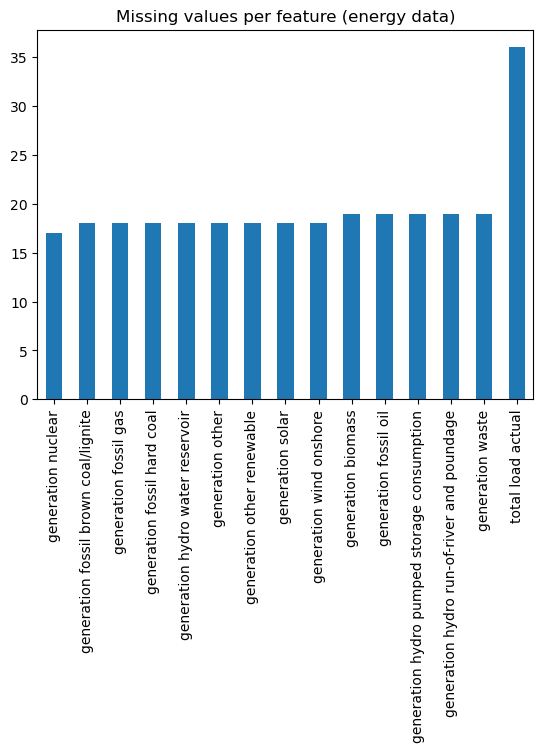

In [6]:
#Energy data
missing_values = energy_processor.data.isnull().sum()

print("Total of missing values in energy data: {} ({}% of data))\n".format(missing_values.sum(), 
      round(missing_values.sum()/energy_processor.data.shape[0]*100, 2)))

print("Number of missing values before imputation:\n" + str(missing_values))

missing_values = missing_values[missing_values > 0]
if missing_values.shape[0]:
    missing_values.sort_values(inplace=True)
    missing_values.plot.bar()
    plt.title("Missing values per feature (energy data)")
    plt.show()

- MissForest is a random forest imputation algorithm for missing data, implemented in R in the missForest() package. It initially imputes all missing data using the mean/mode, then for each variable with missing values, MissForest fits a random forest on the observed part and then predicts the missing part. 

In [7]:
# Impute missing values
imputer = MissForest(criterion='squared_error', max_features='sqrt', n_estimators=10, n_jobs=-1, random_state=42)
energy_processor.data = pd.DataFrame(imputer.fit_transform(energy_processor.data), columns=energy_processor.data.columns, index=energy_processor.data.index)

# Check if there are still missing values
missing_values = energy_processor.data.isnull().sum()

print("Total of missing values in energy data: {} ({}% of data))".format(missing_values.sum(),
        round(missing_values.sum()/energy_processor.data.shape[0]*100, 2)))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Total of missing values in energy data: 0 (0.0% of data))


In [8]:
# Weather data
missing_values = weather_processor.data.isnull().sum()

print("Total of missing values in energy data: {} ({}% of data))".format(missing_values.sum(), 
      round(missing_values.sum()/energy_processor.data.shape[0]*100, 2)))

missing_values = missing_values[missing_values > 0]
if missing_values.shape[0]:
    missing_values.sort_values(inplace=True)
    missing_values.plot.bar()
    plt.title("Missing values per feature")
    plt.show()

Total of missing values in energy data: 0 (0.0% of data))


### Merge Data

In [9]:
# group weather data by city and build a dataframe for each group, merging the dataframes  on the index
weather_by_city = weather_processor.data.groupby("city_name")
weather_by_city = [weather_by_city.get_group(x) for x in weather_by_city.groups]
weather_by_city

[                           city_name     temp  temp_min  temp_max  pressure  \
 time                                                                          
 2014-12-31 23:00:00+00:00          0  281.625   281.625   281.625      1035   
 2015-01-01 00:00:00+00:00          0  281.625   281.625   281.625      1035   
 2015-01-01 01:00:00+00:00          0  281.286   281.286   281.286      1036   
 2015-01-01 02:00:00+00:00          0  281.286   281.286   281.286      1036   
 2015-01-01 03:00:00+00:00          0  281.286   281.286   281.286      1036   
 ...                              ...      ...       ...       ...       ...   
 2018-12-31 18:00:00+00:00          0  284.130   282.150   286.150      1027   
 2018-12-31 19:00:00+00:00          0  282.640   281.150   284.150      1027   
 2018-12-31 20:00:00+00:00          0  282.140   280.150   284.150      1028   
 2018-12-31 21:00:00+00:00          0  281.130   278.150   284.150      1028   
 2018-12-31 22:00:00+00:00          0  2

In [10]:
# Number of observations in processed energy data
print("Number of observations in energy data: {}".format(energy_processor.data.shape[0]))
# Number of observations per city
for city_df in weather_by_city:
    print("Number of observations for in weather data for city {}: {}".format(city_df["city_name"].iloc[0], city_df.shape[0]))

Number of observations in energy data: 35064
Number of observations for in weather data for city 0: 35476
Number of observations for in weather data for city 1: 35951
Number of observations for in weather data for city 2: 36267
Number of observations for in weather data for city 3: 35557
Number of observations for in weather data for city 4: 35145


In [11]:
# check for each city_df in weather_by_city if there are duplicate indexes (time)
for city_df in weather_by_city:
    print(city_df.index.duplicated().sum(), " duplicate indexes in city labeled ", city_df["city_name"].iloc[0])

412  duplicate indexes in city labeled  0
887  duplicate indexes in city labeled  1
1203  duplicate indexes in city labeled  2
493  duplicate indexes in city labeled  3
81  duplicate indexes in city labeled  4


- The two dataframes (df_energy and df_weather) cannot be merged yet. There are many duplicates for every city in df_weather and we should drop them and see if their number of rows match.

In [12]:
# drop_duplicates in weather_preprocessor.data
weather_processor.data = weather_processor.data.reset_index(inplace=False).drop_duplicates(subset=["time", "city_name"], keep="first")
weather_processor.set_index_datetime("time")
weather_processor.data

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
time,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,4,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,0,33,2
2015-01-01 00:00:00+00:00,4,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,0,33,2
2015-01-01 01:00:00+00:00,4,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,0,33,2
2015-01-01 02:00:00+00:00,4,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,0,33,2
2015-01-01 03:00:00+00:00,4,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,0,33,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,3,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,0,33,2
2018-12-31 19:00:00+00:00,3,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,0,33,2
2018-12-31 20:00:00+00:00,3,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,0,33,2


In [13]:
# Number of observations in processed energy data
print("Number of observations in energy data: {}".format(energy_processor.data.shape[0]))

weather_by_city = weather_processor.data.groupby("city_name")
weather_by_city = [weather_by_city.get_group(x) for x in weather_by_city.groups]

# Number of observations per city
for city_df in weather_by_city:
    print("Number of observations for in weather data for city {}: {}".format(city_df["city_name"].iloc[0], city_df.shape[0]))

# This ensures consistency between the energy and weather data, in order to avoid problems when merging the dataframes

Number of observations in energy data: 35064
Number of observations for in weather data for city 0: 35064
Number of observations for in weather data for city 1: 35064
Number of observations for in weather data for city 2: 35064
Number of observations for in weather data for city 3: 35064
Number of observations for in weather data for city 4: 35064


- This ensures consistency between the energy and weather data, in order to avoid problems when merging the dataframes

In [14]:
df_weather = weather_processor.data.reset_index().duplicated(subset=['time', 'city_name'], 
                                                   keep='first').sum()
print('There are {} duplicate rows in weather data ' \
      'based on all columns except "time" and "city_name".'.format(df_weather))

There are 0 duplicate rows in weather data based on all columns except "time" and "city_name".


In [15]:
# Merge all dataframes into a final dataframe

df_1, df_2, df_3, df_4, df_5 = weather_by_city
dfs = [df_1, df_2, df_3, df_4, df_5]

energy_weather = energy_processor.data.copy()

for df in dfs:
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    df = df.add_suffix('_{}'.format(city_str))
    energy_weather = energy_weather.merge(df, on=['time'], how='outer')
    energy_weather = energy_weather.drop('city_name_{}'.format(city_str), axis=1)
    
energy_weather.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'temp_0', 'temp_min_0', 'temp_max_0', 'pressure_0',
       'humidity_0', 'wind_speed_0', 'wind_deg_0', 'rain_1h_0', 'rain_3h_0',
       'snow_3h_0', 'clouds_all_0', 'weather_id_0', 'weather_main_0',
       'weather_description_0', 'weather_icon_0', 'temp_1', 'temp_min_1',
       'temp_max_1', 'pressure_1', 'humidity_1', 'wind_speed_1', 'wind_deg_1',
       'rain_1h_1', 'rain

In [16]:
# check if there are still missing values
missing_values = energy_weather.isnull().sum()

print("Total of missing values in energy data: {} ({}% of data))".format(missing_values.sum(),
        round(missing_values.sum()/energy_weather.shape[0]*100, 2)))

Total of missing values in energy data: 0 (0.0% of data))


### Generate new Features

In [17]:
# Generate 'hour', 'weekday' and 'month' features

for i in range(len(energy_weather)):
    position = energy_weather.index[i]
    hour = position.hour
    weekday = position.weekday()
    month = position.month
    energy_weather.loc[position, 'hour'] = hour
    energy_weather.loc[position, 'weekday'] = weekday
    energy_weather.loc[position, 'month'] = month

energy_weather.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,rain_3h_4,snow_3h_4,clouds_all_4,weather_id_4,weather_main_4,weather_description_4,weather_icon_4,hour,weekday,month
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,0.0,0.0,0,800,0,33,2,23.0,2.0,12.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,0.0,0.0,0,800,0,33,2,0.0,3.0,1.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,0.0,0.0,0,800,0,33,2,1.0,3.0,1.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,0.0,0.0,0,800,0,33,2,2.0,3.0,1.0
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,0.0,0.0,0,800,0,33,2,3.0,3.0,1.0


In [18]:
# # Generate 'working hour' feature

for i in range(len(energy_weather)):
    position = energy_weather.index[i]
    hour = position.hour
    if ((hour > 8 and hour < 13) or (hour > 15 and hour < 19)):
        energy_weather.loc[position, 'business hour'] = 2
    elif (hour >= 13 and hour <= 15):
        energy_weather.loc[position, 'business hour'] = 1
    else:
        energy_weather.loc[position, 'business hour'] = 0

# Generate 'weekend' feature

for i in range(len(energy_weather)):
    position = energy_weather.index[i]
    weekday = position.weekday()
    if (weekday == 6):
        energy_weather.loc[position, 'weekday'] = 2
    elif (weekday == 5):
        energy_weather.loc[position, 'weekday'] = 1
    else:
        energy_weather.loc[position, 'weekday'] = 0

energy_weather.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,snow_3h_4,clouds_all_4,weather_id_4,weather_main_4,weather_description_4,weather_icon_4,hour,weekday,month,business hour
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,0.0,0,800,0,33,2,23.0,0.0,12.0,0.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,0.0,0,800,0,33,2,0.0,0.0,1.0,0.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,0.0,0,800,0,33,2,1.0,0.0,1.0,0.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,0.0,0,800,0,33,2,2.0,0.0,1.0,0.0
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,0.0,0,800,0,33,2,3.0,0.0,1.0,0.0


### Scaling

In [19]:
energy_weather_processor = data_processor.DataProcessor(energy_weather)

energy_weather_processor.scale()

X, y = energy_weather_processor.create_feature_matrix_and_target_vector("price actual")

# Time series split 0.8/0.2 train/test split (no shuffle to avoid data leakage)
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, shuffle=False)

### Feature Extraction

- Autoencoder LSTM is chosen over PCA for feature extraction due to its ability to learn nonlinear transformations. Its layered neural net structure allows it to capture complex and nonlinear relationships in the data. Unlike PCA, which assumes linear relationships, Autoencoder LSTM excels in handling intricate data structures. Moreover, it is particularly effective for sequential data like time series, as it can capture temporal dependencies through its LSTM architecture

##### LSTM AutoEncoder

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/50
460/460 - 5s - loss: 0.3395 - val_loss: 0.5791 - 5s/epoch - 10ms/step
Epoch 2/50
460/460 - 1s - loss: 0.2357 - val_loss: 0.5475 - 1s/epoch - 3ms/step
Epoch 3/50
460/460 - 2s - loss: 0.2211 - val_loss: 0.4409 - 2s/epoch - 3ms/step
Epoch 4/50
460/460 - 1s - loss: 0.2000 - val_loss: 0.4545 - 1s/epoch - 3ms/step
Epoch 5/50
460/460 - 1s - loss: 0.1891 - val_loss: 0.4849 - 1s/epoch - 3ms/step
Epoch 6/50
460/460 - 1s - loss: 0.1669 - val_loss: 0.5787 - 1s/epoch - 3ms/step
Epoch 7/50
460/460 - 1s - loss: 0.1610 - val_loss: 0.4655 - 1s/epoch - 3ms/step
Epoch 8/50
460/460 - 1s - loss: 0.1584 - val_loss: 0.4241 - 1s/epoch - 3ms/step
Epoch 9/50
460/460 - 1s - loss: 0.1510 - val_loss: 0.5279 - 1s/epoch - 3ms/step
Epoch 10/50
460/460 - 2s - loss: 0.1489 - val_loss: 0.5331 - 2s/epoch - 3ms/step
Epoch 11/50
460/460 - 1s - loss: 0.1464 - val_los

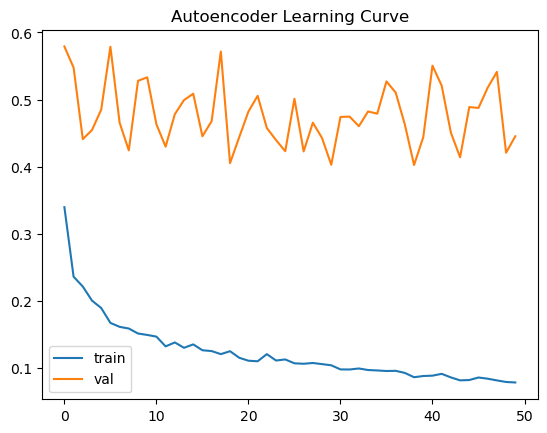

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [27]:
# train autoencoder for classification with compression in the bottleneck layer
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.utils import plot_model
from matplotlib import pyplot


# number of input columns
n_inputs = X.shape[-1]
# split into train and val sets (80/20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'encoder_bottleneck_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=2, validation_data=(X_val,y_val))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.title("Autoencoder Learning Curve")
# save plot
plt.savefig('../plots/ae_learning_curve.png')
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_bottleneck_compress.png', show_shapes=True)
# save the encoder to file
encoder.save("../artifacts/autoencoder.h5")

In [28]:
# load the model from file
encoder = keras.models.load_model("../artifacts/autoencoder.h5")
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_val_encode = encoder.predict(X_val)

58/58 [==============================] - 0s 2ms/step


In [31]:
X_encode

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48
0,1.190129,-2.913082,1.029042,1.241184,0.996761,-1.570009,4.438194,-1.324989,-2.732975,-0.649519,...,0.815354,-4.172697,1.725361,-4.000506,-1.628404,-0.391624,1.332543,-0.871689,-1.778548,-1.935766
1,0.455637,-2.611026,-0.301034,-0.186448,1.109531,-2.254008,2.064908,-0.362496,-0.606309,1.129891,...,1.525611,-2.509715,0.019767,-1.186638,-1.009699,-0.294591,1.195618,-0.005432,-1.589784,-0.374735
2,0.478243,-3.030135,-0.153581,0.083871,1.257563,-2.224059,1.887995,-0.483371,-0.265258,1.162271,...,1.323844,-2.416255,0.425436,-1.204657,-1.413615,-0.335265,0.735174,-0.219494,-1.836741,-0.361646
3,0.286429,-3.447635,-0.144740,0.410552,1.411411,-2.108791,1.588819,-0.565251,0.014990,1.341540,...,1.002828,-2.343132,0.694970,-0.863512,-1.704114,-0.002703,0.483519,-0.205451,-2.255093,-0.376014
4,0.285567,-3.602308,0.141949,0.569249,1.487317,-1.897526,1.340265,-0.544200,0.215328,1.405499,...,0.657522,-2.278642,0.851749,-0.833796,-2.113175,0.080565,0.197940,-0.250338,-2.390427,-0.419034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9185,0.197877,-2.836833,-1.034256,2.049981,2.933022,-2.984175,0.880857,-1.114439,3.438915,2.419772,...,2.461106,-1.371145,0.383081,0.985001,-1.915155,-1.570813,-1.030525,1.058917,-3.444193,2.738655
9186,0.087564,-1.768266,-1.454464,1.011644,1.905403,-3.008595,0.451351,-1.349361,2.989149,2.523152,...,3.809136,-1.280176,-0.158022,1.170207,-0.384951,-2.112558,-1.610685,0.525894,-2.088886,2.375629
9187,-0.544050,-1.120247,-2.505854,0.904593,0.659123,-3.373755,0.371049,-1.683064,1.848145,3.720095,...,5.906637,-1.729291,-1.235832,1.093324,0.426282,-2.391344,-1.029410,0.231137,-1.709352,2.042824
9188,-0.701109,-0.642948,-2.689021,1.197678,0.024187,-3.462630,-0.202178,-1.177968,1.213983,3.958160,...,6.000730,-1.333426,-1.815425,0.307945,0.114928,-2.669010,-0.756510,-0.043481,-1.086372,2.516439


In [33]:
import numpy as np
# join X_train_encode and X_test_encode to a single dataframe
X_encode = np.concatenate((X_train_encode, X_val_encode), axis=0)
X_encode = pd.DataFrame(X_encode, columns=[f"feature_{i}" for i in range(X_encode.shape[1])])

# set X_encode index index to X index
#X_encode.index = X_train.index

# concatenate X_encode and the last column of X to a single dataframe 
X_encode = pd.concat([X_encode, X.iloc[:, -1]], axis=1)
X_encode

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,business hour
0,1.190129,-2.913082,1.029042,1.241184,0.996761,-1.570009,4.438194,-1.324989,-2.732975,-0.649519,...,-4.172697,1.725361,-4.000506,-1.628404,-0.391624,1.332543,-0.871689,-1.778548,-1.935766,-0.796972
1,0.455637,-2.611026,-0.301034,-0.186448,1.109531,-2.254008,2.064908,-0.362496,-0.606309,1.129891,...,-2.509715,0.019767,-1.186638,-1.009699,-0.294591,1.195618,-0.005432,-1.589784,-0.374735,-0.796972
2,0.478243,-3.030135,-0.153581,0.083871,1.257563,-2.224059,1.887995,-0.483371,-0.265258,1.162271,...,-2.416255,0.425436,-1.204657,-1.413615,-0.335265,0.735174,-0.219494,-1.836741,-0.361646,-0.796972
3,0.286429,-3.447635,-0.144740,0.410552,1.411411,-2.108791,1.588819,-0.565251,0.014990,1.341540,...,-2.343132,0.694970,-0.863512,-1.704114,-0.002703,0.483519,-0.205451,-2.255093,-0.376014,-0.796972
4,0.285567,-3.602308,0.141949,0.569249,1.487317,-1.897526,1.340265,-0.544200,0.215328,1.405499,...,-2.278642,0.851749,-0.833796,-2.113175,0.080565,0.197940,-0.250338,-2.390427,-0.419034,-0.796972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.453302
35060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.796972
35061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.796972
35062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.796972


### Save Data

In [34]:
# processed_merged_data

with open('../data/processed/processed_merged_data.pkl', 'wb') as f:
    pkl.dump(energy_weather_processor.data, f)

X_encode.to_pickle("../data/processed/processed_merged_data_ae.pkl")